## 動作確認

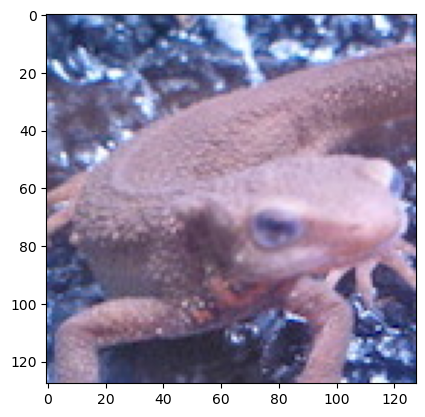

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

path = "/work/Gasyori100knock-1/Tutorial/assets/imori.jpg"
path_noise = "/work/Gasyori100knock-1/Question_01_10/imori_noise.jpg"
path_dark = "/work/Gasyori100knock-1/Question_11_20/imori_dark.jpg"
path_gamma = "/work/Gasyori100knock-1/Question_21_30/imori_gamma.jpg"

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Question01-10

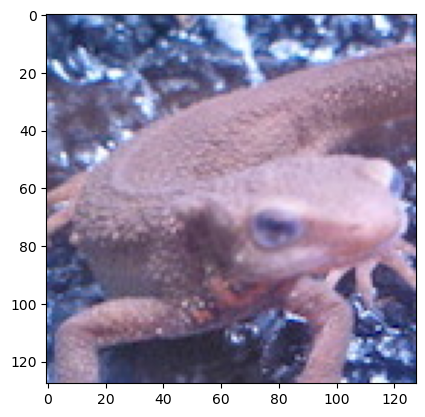

In [ ]:
def BGR2EGB(img):
    blue = img[:, : ,0].copy()
    green = img[:, : ,1].copy()
    red = img[:, : ,2].copy()

    img[:, : ,0] = red
    img[:, : ,1] = green
    img[:, : ,2] = blue

    return img

img = cv2.imread("/work/Gasyori100knock-1/Tutorial/assets/imori.jpg")
img = BGR2EGB(img)

plt.imshow(img)
plt.show()

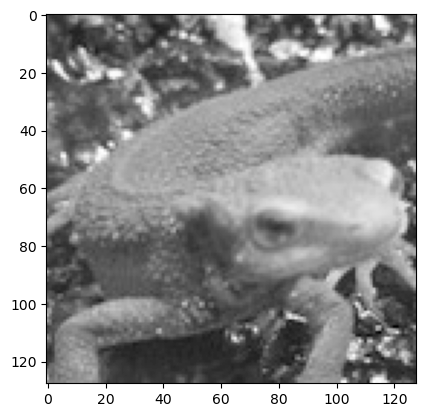

In [ ]:
def grayscale(img):
    out = img.copy()
    out = 0.2126 * out[:, :, 2] + 0.7152 * out[:, :, 1] + 0.0722 * out[:, :, 0]
    out = out.astype(np.uint8)

    return out

img = cv2.imread(path)
out = grayscale(img)

plt.imshow(out, cmap="gray")
plt.show()

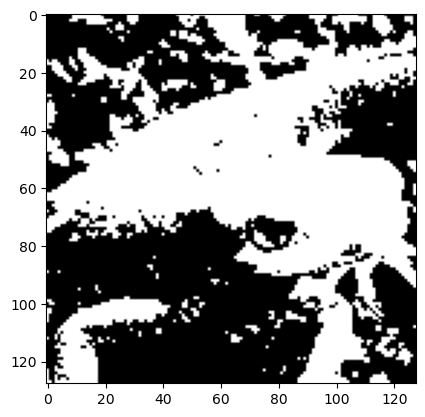

In [10]:
def binaryscale(img):
    out = img.copy()
    out = 0.2126 * out[:, :, 2] + 0.7152 * out[:, :, 1] + 0.0722 * out[:, :, 0]
    out = np.where(out < 128, 0, 255)
    out = out.astype(np.uint8)

    return out

img = cv2.imread(path)
out = binaryscale(img)

plt.imshow(out, cmap="gray")
plt.show()

In [ ]:
# 画像をgrayscale変換する
# grayscale画像をotsubinary変換する
    # Sb^2が最大となる閾値thrを求める
        # for文でthr(0-255)を探索する
            # w0とw1を求める
            # M0とM1を求める
            # Sb^2を計算する
            # Sb^2最大値を上回っていたら
                # Sb2^2最大値を更新
                # 現在のthrの値を取得
    # thrでgrayscale画像をbinary変換する

max_thr --> 127


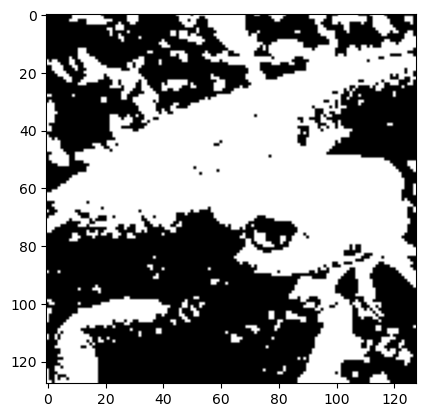

In [24]:
def grayscale(img):
    out = img.copy()
    out = 0.2126 * out[:, :, 2] + 0.7152 * out[:, :, 1] + 0.0722 * out[:, :, 0]
    out = out.astype(np.uint8)

    return out

def otsubinary(img):
    out = img.copy()
    max_thr = 0
    max_sigma = 0

    for thr in range(1, 256):
        v0 = out[out < thr]
        v1 = out[out >= thr]

        w0 = v0.size / (v0.size + v1.size)
        w1 = v1.size / (v0.size + v1.size)

        m0 = np.mean(v0) if np.sum(v0 > 0) else 0
        m1 = np.mean(v1) if np.sum(v1 > 0) else 0

        sigma = w0 * w1 * ((m0 - m1) ** 2)

        if sigma > max_sigma:
            max_sigma = sigma
            max_thr = thr
    
    print(f"max_thr --> {max_thr}")
    out = np.where(out < max_thr, 0, 255)
    out = out.astype(np.uint8)

    return out

img = cv2.imread(path)
gray = grayscale(img)
out = otsubinary(gray)

plt.imshow(out, cmap="gray")
plt.show()

In [ ]:
# 減色処理を行う
    # imgを読み込む
    # BGRを取得する
    # 各色を条件に応じて変換する
    # 減色した画像を表示する

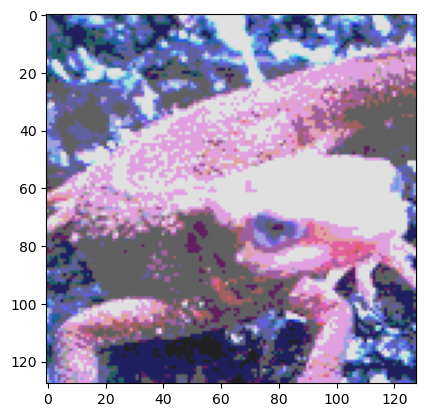

In [ ]:
def convert_reduction(img):

    out = img.copy()
    for i in range(3):
        out[:, :, i] = np.where(out[:, :, i] < 64 , 32,
                        np.where(out[:, :, i] < 128 , 96,
                        np.where(out[:, :, i] < 192 , 160, 224)))
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    return out

img = cv2.imread(path)
out = convert_reduction(img)

plt.imshow(out)
plt.show()

In [ ]:
# 平均プーリング
    # 分割幅を定める
    # for文で行番号と列番号を指定
        # グリッド内のRGBの平均値を取得
        # RGBを平均値に書き換える
    # プーリング後の画像を出力する

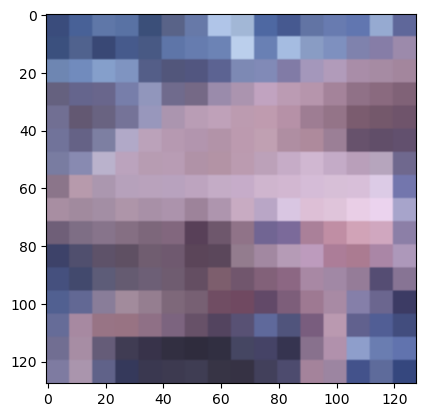

In [31]:
def avg_pooling(img, grid = 8):
    height, width, channel = img.shape
    num_height = int(height / grid)
    num_widht = int(width / grid)

    out = img.copy()
    tmp = img.copy()

    for y in range(num_height):
        for x in range(num_widht):
            for c in range(channel):
                out[y*grid:(y+1)*grid, x*grid:(x+1)*grid, c] = np.mean(tmp[y*grid:(y+1)*grid, x*grid:(x+1)*grid, c])

    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    return out

img = cv2.imread(path)
out = avg_pooling(img)

plt.imshow(out)
plt.show()

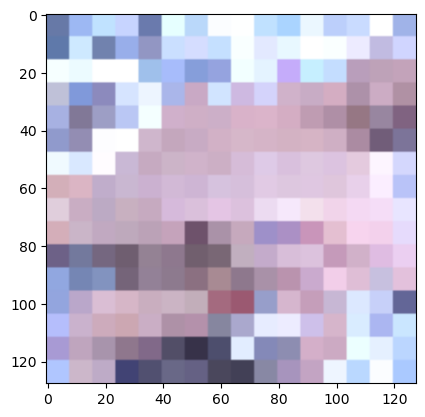

In [32]:
def max_pooling(img, grid = 8):
    height, width, channel = img.shape
    num_height = int(height / grid)
    num_widht = int(width / grid)

    out = img.copy()
    tmp = img.copy()

    for y in range(num_height):
        for x in range(num_widht):
            for c in range(channel):
                out[y*grid:(y+1)*grid, x*grid:(x+1)*grid, c] = np.max(tmp[y*grid:(y+1)*grid, x*grid:(x+1)*grid, c])

    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    return out

img = cv2.imread(path)
out = max_pooling(img)

plt.imshow(out)
plt.show()

In [ ]:
# gaussianfilter
# paddingの準備を行う
    # 元画像のshapeを取得する
    # shapeよりpad*2だけ大きい行列を生成
    # padの内側だけ、元の画像の画素を挿入する
# ガウシアンフィルタを作成する
    # k_sizeの正方行列を作成する
    # 各値を挿入する
# ガウシアンフィルタをかける
    # for文で注目画素を抽出する
    # 注目画素の周辺も含めた行列を取得する
    # 抽出した行列とガウシアンフィルタの行列を乗算して合計を取る

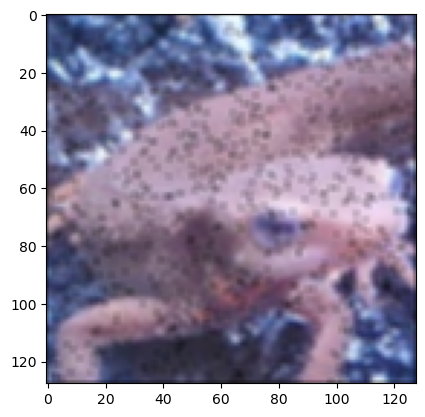

In [76]:
def gaussian_filter(img, k_size=3):
    height, width, channel = img.shape
    pad = k_size // 2
    out = np.zeros((height+pad*2, width+pad*2, channel), dtype=np.float64)
    out[pad:height+pad, pad:width+pad] = img.copy()
    tmp = out.copy()

    filter = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype=np.float64)
    filter /= 16

    for y in range(height):
        for x in range(width):
            for c in range(channel):
                out[y+pad, x+pad, c] = np.sum(tmp[y:y+k_size, x:x+k_size, c] * filter)

    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    return out

img = cv2.imread(path_noise)
out = gaussian_filter(img)

plt.imshow(out)
plt.show()

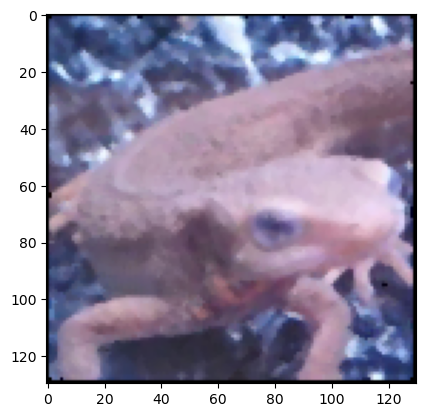

In [41]:
def median_filter(img, k_size=3):
    height, width, channel = img.shape
    pad = k_size // 2
    out = np.zeros((height+pad*2, width+pad*2, channel), dtype=np.float64)
    out[pad:height+pad, pad:width+pad] = img.copy()
    tmp = out.copy()

    for y in range(height):
        for x in range(width):
            for c in range(channel):
                out[y+pad, x+pad, c] = np.median(tmp[y:y+k_size, x:x+k_size, c])

    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    return out

img = cv2.imread(path_noise)
out = median_filter(img)

plt.imshow(out)
plt.show()

## Question11-20

In [ ]:
# フィルタサイズに合わせて、padを付与する
    # h, w, c　を取得する
    # フィルタサイズ // 2 でpadの枠を決める
    # np.zeros()で、pad込みのoutを作成
    # padの内側に、imgの値を入力する
# 平滑化フィルタを実施する
    # forループで、padの内側だけ指定する
        # 注目画素の周りの行列を取得して、平均を取る
        # 注目画素に平均値を代入する
    # padの内側だけ、outとして取得する
# BGR2RGBを実施する

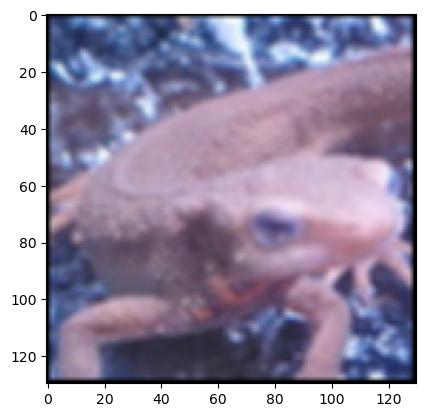

In [46]:
def average_filter(img, k_size=3):
    height, width, channel = img.shape
    pad = k_size // 2
    out = np.zeros((height+pad*2, width+pad*2, channel), dtype=np.float64)
    out[pad:height+pad, pad:width+pad] = img.copy()
    tmp = out.copy()

    for y in range(height):
        for x in range(width):
            for c in range(channel):
                out[y+pad, x+pad, c] = np.average(tmp[y:y+k_size, x:x+k_size, c])

    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    return out

img = cv2.imread(path)
out = average_filter(img)

plt.imshow(out)
plt.show()

[[0.33333333 0.         0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.         0.33333333]]


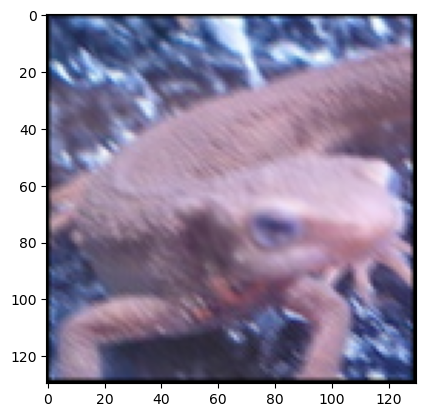

In [ ]:
def motion_filter(img, k_size=3):
    height, width, channel = img.shape
    pad = k_size // 2
    out = np.zeros((height+pad*2, width+pad*2, channel), dtype=np.float64)
    out[pad:height+pad, pad:width+pad] = img.copy()
    tmp = out.copy()

    filter = np.diag(np.array([1/3,1/3,1/3]))

    for y in range(height):
        for x in range(width):
            for c in range(channel):
                out[y+pad, x+pad, c] = np.sum(tmp[y:y+k_size, x:x+k_size, c] * filter)

    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    return out

img = cv2.imread(path)
out = motion_filter(img)

plt.imshow(out)
plt.show()

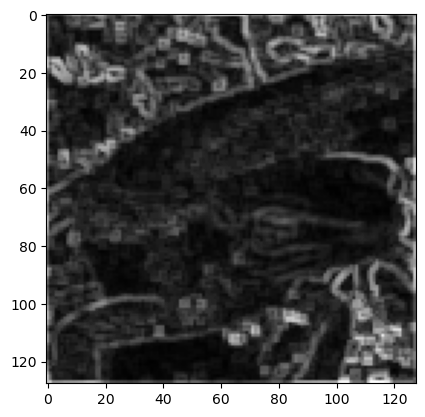

In [ ]:
def grayscale(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    # Gray scale
    out = 0.2126 * r + 0.7152 * g + 0.0722 * b
    out = out.astype(np.uint8)

    return out

def minmax_filter(img, k_size = 3):
    height, width = img.shape # imgはgrayscale前提
    pad = k_size // 2

    out = np.zeros((height + (pad*2), width + (pad*2)), dtype=np.float64)
    out[pad:height+pad, pad:width+pad] = img.copy().astype(np.float64)
    tmp = out.copy()

    max_num = 0
    min_num = 0

    for y in range(height):
        for x in range(width):
            max_num = np.max(tmp[y:y+k_size, x:x+k_size])
            min_num = np.min(tmp[y:y+k_size, x:x+k_size])
            out[y+pad, x+pad] = max_num - min_num
    out = out[pad:height+pad, pad:width+pad].astype(np.uint8)

    return out

img = cv2.imread(path)
out = grayscale(img)
out = minmax_filter(out)

plt.imshow(out, cmap="gray")
plt.show()

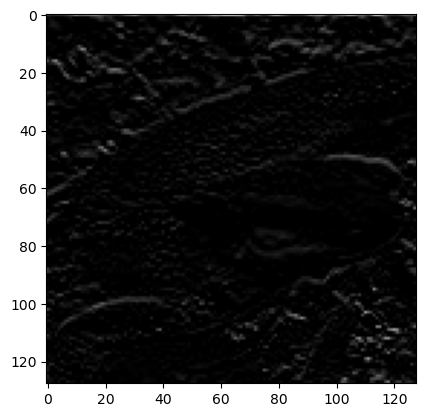

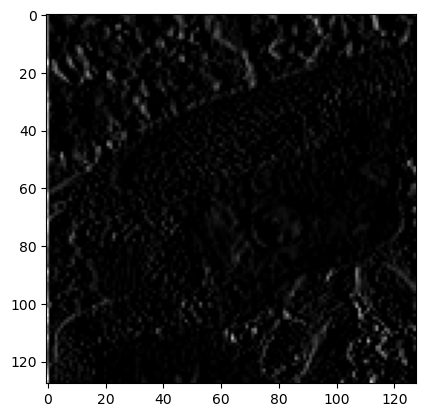

In [26]:
def grayscale(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    # Gray scale
    out = 0.2126 * r + 0.7152 * g + 0.0722 * b
    out = out.astype(np.uint8)

    return out

def diff_filter(img, k_size = 3):
    height, width = img.shape # imgはgrayscale前提
    pad = k_size // 2
    
    out = np.zeros((height + pad * 2, width + pad * 2), dtype=np.float64)
    out[pad:height+pad, pad:width+pad] = img.copy().astype(np.float64)
    tmp = out.copy()

    out_v = out.copy()
    out_h = out.copy()

    kv = [[0., -1., 0.],[0., 1., 0.],[0., 0., 0.]]
    kh = [[0., 0., 0.],[-1., 1., 0.], [0., 0., 0.]]

    for y in range(height):
        for x in range(width):
            out_v[y+pad, x+pad] = np.sum(kv * tmp[y:y+k_size, x:x+k_size])
            out_h[y+pad, x+pad] = np.sum(kh * tmp[y:y+k_size, x:x+k_size])

    out_v = np.clip(out_v, 0, 255)
    out_h = np.clip(out_h, 0, 255)
    out_v = out_v[pad:height+pad, pad:width+pad].astype(np.uint8)
    out_h = out_h[pad:height+pad, pad:width+pad].astype(np.uint8)

    return out_v, out_h

img = cv2.imread(path)
out = grayscale(img)
out_v, out_h = diff_filter(out)

plt.imshow(out_v, cmap="gray")
plt.show()

plt.imshow(out_h, cmap="gray")
plt.show()

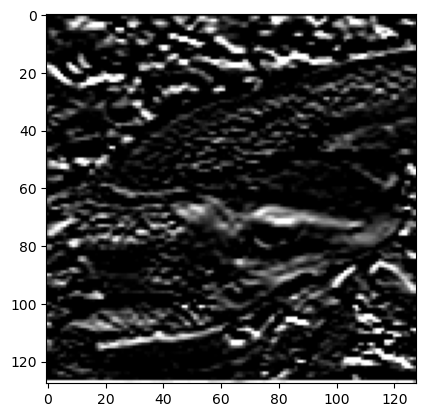

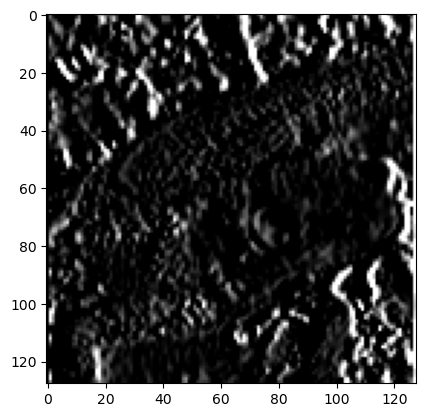

In [ ]:
def grayscale(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    # Gray scale
    out = 0.2126 * r + 0.7152 * g + 0.0722 * b
    out = out.astype(np.uint8)

    return out

def sobel_filter(img, k_size = 3):
    height, width = img.shape
    pad = k_size // 2
    
    out = np.zeros((height + pad * 2, width + pad * 2), dtype=np.float64)
    out[pad:height+pad, pad:width+pad] = img.copy().astype(np.float64)
    tmp = out.copy()

    out_v = out.copy()
    out_h = out.copy()

    kv = [[1., 2., 1.],[0., 0., 0.],[-1., -2., -1.]]
    kh = [[1., 0., -1.],[2., 0., -2.], [1., 0., -1.]]

    for y in range(height):
        for x in range(width):
            out_v[y+pad, x+pad] = np.sum(kv * tmp[y:y+k_size, x:x+k_size])
            out_h[y+pad, x+pad] = np.sum(kh * tmp[y:y+k_size, x:x+k_size])

    out_v = np.clip(out_v, 0, 255)
    out_h = np.clip(out_h, 0, 255)
    out_v = out_v[pad:height+pad, pad:width+pad].astype(np.uint8)
    out_h = out_h[pad:height+pad, pad:width+pad].astype(np.uint8)

    return out_v, out_h

img = cv2.imread(path)
out = grayscale(img)
out_v, out_h = sobel_filter(out)

plt.imshow(out_v, cmap="gray")
plt.show()

plt.imshow(out_h, cmap="gray")
plt.show()

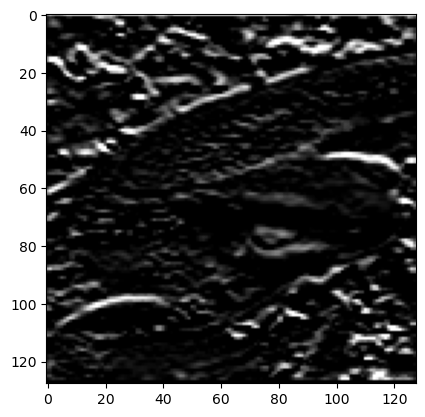

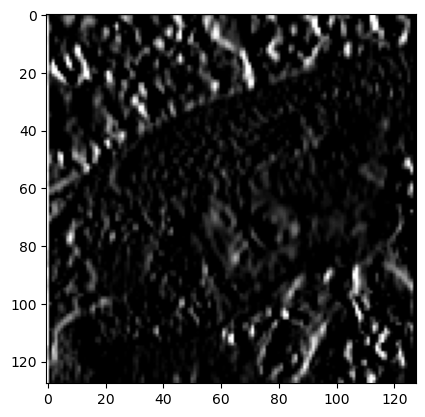

In [27]:
def grayscale(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    # Gray scale
    out = 0.2126 * r + 0.7152 * g + 0.0722 * b
    out = out.astype(np.uint8)

    return out

def prewitt_filter(img, k_size = 3):
    height, width = img.shape
    pad = k_size // 2
    
    out = np.zeros((height + pad * 2, width + pad * 2), dtype=np.float64)
    out[pad:height+pad, pad:width+pad] = img.copy().astype(np.float64)
    tmp = out.copy()

    out_v = out.copy()
    out_h = out.copy()

    kv = [[-1., -1., -1.],[0., 0., 0.],[1., 1., 1.]]
    kh = [[-1., 0., 1.],[-1., 0., 1.], [-1., 0., 1.]]

    for y in range(height):
        for x in range(width):
            out_v[y+pad, x+pad] = np.sum(kv * tmp[y:y+k_size, x:x+k_size])
            out_h[y+pad, x+pad] = np.sum(kh * tmp[y:y+k_size, x:x+k_size])

    out_v = np.clip(out_v, 0, 255)
    out_h = np.clip(out_h, 0, 255)
    out_v = out_v[pad:height+pad, pad:width+pad].astype(np.uint8)
    out_h = out_h[pad:height+pad, pad:width+pad].astype(np.uint8)

    return out_v, out_h

img = cv2.imread(path)
out = grayscale(img)
out_v, out_h = prewitt_filter(out)

plt.imshow(out_v, cmap="gray")
plt.show()

plt.imshow(out_h, cmap="gray")
plt.show()

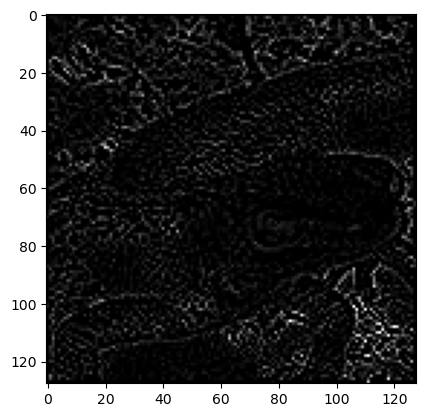

In [28]:
def grayscale(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    # Gray scale
    out = 0.2126 * r + 0.7152 * g + 0.0722 * b
    out = out.astype(np.uint8)

    return out

def laplacian_filter(img, k_size = 3):
    height, width = img.shape
    pad = k_size // 2
    
    out = np.zeros((height + pad * 2, width + pad * 2), dtype=np.float64)
    out[pad:height+pad, pad:width+pad] = img.copy().astype(np.float64)
    tmp = out.copy()

    k = [[0., 1., 0.],[1., -4., 1.],[0., 1., 0.]]

    for y in range(height):
        for x in range(width):
            out[y+pad, x+pad] = np.sum(k * tmp[y:y+k_size, x:x+k_size])

    out = np.clip(out, 0, 255)
    out = out[pad:height+pad, pad:width+pad].astype(np.uint8)

    return out

img = cv2.imread(path)
out = grayscale(img)
out = laplacian_filter(out)

plt.imshow(out, cmap="gray")
plt.show()

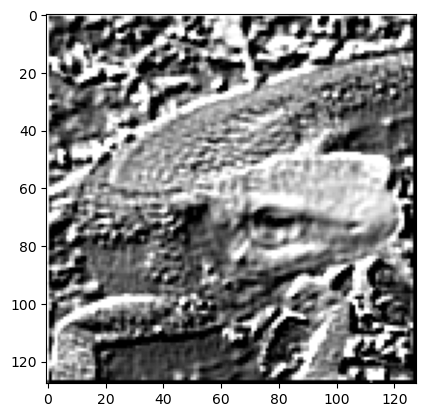

In [29]:
def grayscale(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    # Gray scale
    out = 0.2126 * r + 0.7152 * g + 0.0722 * b
    out = out.astype(np.uint8)

    return out

def emboss_filter(img, k_size = 3):
    height, width = img.shape
    pad = k_size // 2
    
    out = np.zeros((height + pad * 2, width + pad * 2), dtype=np.float64)
    out[pad:height+pad, pad:width+pad] = img.copy().astype(np.float64)
    tmp = out.copy()

    k = [[-2., -1., 0.],[-1., 1., 1.],[0., 1., 2.]]

    for y in range(height):
        for x in range(width):
            out[y+pad, x+pad] = np.sum(k * tmp[y:y+k_size, x:x+k_size])

    out = np.clip(out, 0, 255)
    out = out[pad:height+pad, pad:width+pad].astype(np.uint8)

    return out

img = cv2.imread(path)
out = grayscale(img)
out = emboss_filter(out)

plt.imshow(out, cmap="gray")
plt.show()

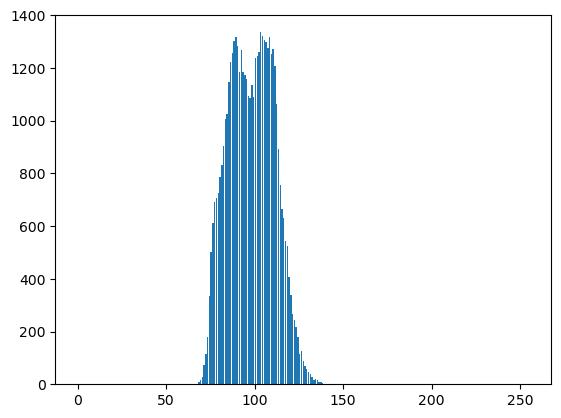

In [ ]:
img = cv2.imread("/work/Gasyori100knock-1/Question_11_20/imori_dark.jpg")
img_array = img.ravel()
plt.hist(img_array, bins=255, rwidth=0.8, range=(0, 255))
plt.show()

## Qusetion21-30

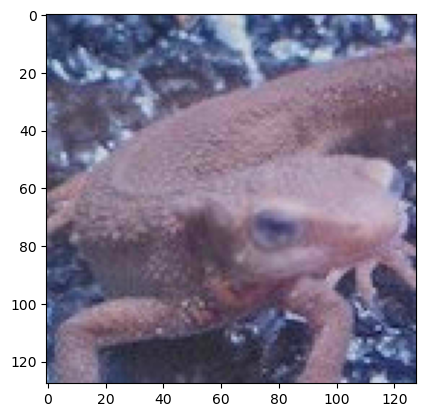

In [12]:
# histgram normarization
def histgram_normalization(img, min_val_out = 0, max_val_out = 255):
    min_val_in = np.min(img)
    max_val_in = np.max(img)
    out = img.copy()

    out = (max_val_out - min_val_out) / (max_val_in - min_val_in) * (out - min_val_in) + min_val_out
    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    return out

img = cv2.imread(path_dark)
out = histgram_normalization(img)

plt.imshow(out)
plt.show()

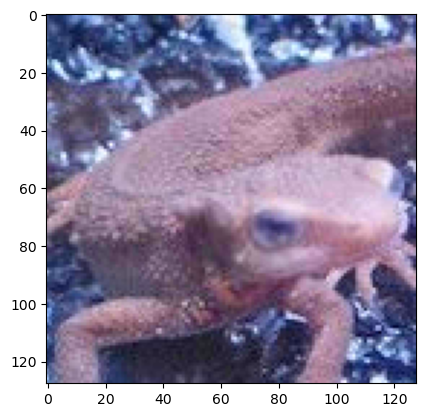

In [2]:
# histgram convert
# 変換後のmean0とstd0をデフォルト値に入れる
    # imgを取得(out,tmp)
    # imgのmeanとstdを取得
    # out = std0 / std * (tmp - mean) + mean0

def convert_histgram(img, mean_out=128, std_out=52):
    mean_in = np.mean(img)
    std_in = np.std(img)
    out = img.copy()

    out = std_out / std_in * (out - mean_in) + mean_out
    out = np.where(out < 0, 0,
            np.where(out > 255, 255, out))
    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    return out

img = cv2.imread(path_dark)
out = convert_histgram(img)

plt.imshow(out)
plt.show()

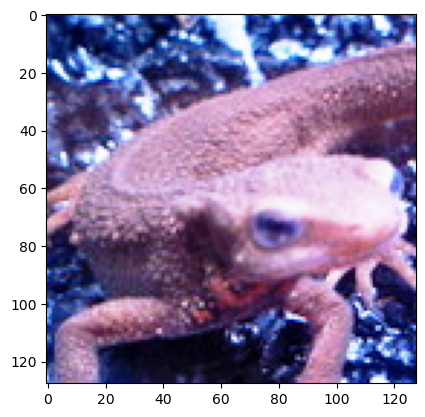

In [74]:
# histgram equalization

def hist_equal(img, z_max=255):
    sigma = img.size
    out = img.copy()
    sum_h = 0.

    for i in range(1, 255):
        index = np.where(img == i)
        sum_h += len(img[index])
        z_prime = z_max / sigma * sum_h
        out[index] = z_prime

    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    return out

img = cv2.imread(path)
out = hist_equal(img)

plt.imshow(out)
plt.show()

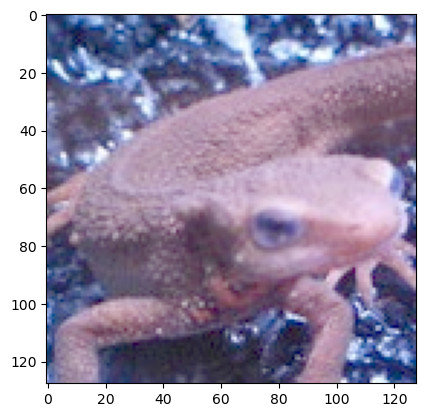

In [ ]:
def gamma_correction(img, c=1, g=2.2):
    out = img.copy()

    out = out / 255.0 # 正規化
    out = (1/c * out) ** (1/g)
    out = out * 255 # 正規化を戻す

    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    return out

img = cv2.imread(path_gamma)
out = gamma_correction(img)

plt.imshow(out)
plt.show()

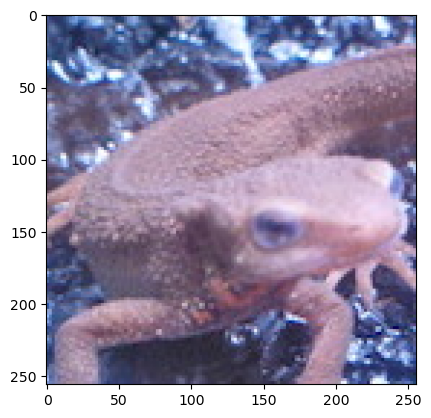

In [6]:
# nearest neighbor
    # 画素を取得する
    # 拡大先の画像を作る
        # shapeを取得する
        # hとwに拡大率をかける
        # 拡大後のhとwでoutを作成
    # 拡大処理
        # outの出力先に、inの注目画素の値を入れる
        # for文でinのindexをoutのindexに反映する

def nearest_neighbor(img, mag_rate=2):
    h, w, c = img.shape
    h_out = h * mag_rate
    w_out = w * mag_rate
    out = np.zeros((h_out, w_out, c))

    for y in range(h):
        for x in range(w):
            out[y*mag_rate:(y+1)*mag_rate, x*mag_rate:(x+1)*mag_rate] = img[y,x]
    
    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    return out

img = cv2.imread(path)
out = nearest_neighbor(img)

plt.imshow(out)
plt.show()

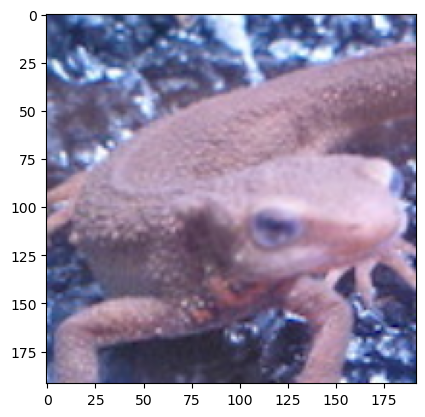

In [17]:
def bl_interpolate(img, ax=1., ay=1.):
    h, w, c = img.shape

    ah = int(ay * h)
    aw = int(ax * w)

    # get position of resized image
    y = np.arange(ah).repeat(aw).reshape(ah, -1)
    x = np.tile(np.arange(aw), (ah, 1))
    
    # get position of original position
    y = (y / ay)
    x = (x / ax)

    ix = np.floor(x).astype(np.int64)
    iy = np.floor(y).astype(np.int64)

    ix = np.minimum(ix, w-2)
    iy = np.minimum(iy, h-2)

    # get distance
    dx = x - ix
    dy = y - iy
    
    dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
    dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)

    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    return out

img = cv2.imread(path)
out = bl_interpolate(img, 1.5, 1.5)
plt.imshow(out)
plt.show()

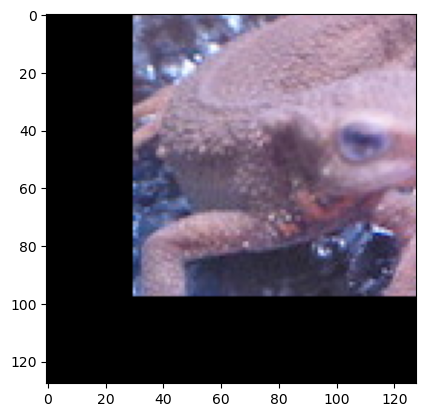

In [35]:
def affine(img, a, b, c, d, tx, ty):
    H, W, C = img.shape

    # 元画像を作成する
    # 画像の外側の座標を参照するとき、余白の座標を指定できるようにする
    tmp = np.zeros((H+2, W+2, C), dtype = np.float32)
    tmp[1:H+1, 1:W+1] = img

    # 出力先の画像を作成する
    H_out = np.round(H * d).astype(np.int64)
    W_out = np.round(W * a).astype(np.int64)
    out = np.zeros((H_out, W_out, C), dtype = np.float32)

    # 出力先の画像の座標を取得
    x_out = np.tile(np.arange(W_out), (H_out, 1)) # tuppleで行列ごとの繰り返し回数を指定
    y_out = np.arange(H_out).repeat(W_out).reshape(H_out, -1) # repeatで各値を指定した回数繰り返す

    # 元画像の座標を取得
    # tmpは元の画像の周りに余白を作成しているため、実際の座標を取得するために+1する
    adbc = a * d - b * c
    x = np.round((d * x_out - b * y_out) / adbc).astype(np.int64) - tx + 1
    y = np.round((-c * x_out + a * y_out) / adbc).astype(np.int64) - ty + 1

    # 座標をクリッピング
    # 値が小さい時は0、大きい時はW+1かH+1で余白が指定できる
    x = np.minimum(np.maximum(x, 0), W+1).astype(np.int64)
    y = np.minimum(np.maximum(y, 0), H+1).astype(np.int64)

    # 出力先の座標に元画像の座標を設定する
    out[y_out, x_out] = tmp[y, x]
    out = out[:H_out, :W_out]

    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    return out

img = cv2.imread(path)
out = affine(img, a=1, b=0, c=0, d=1, tx=30, ty=-30)

plt.imshow(out)
plt.show()

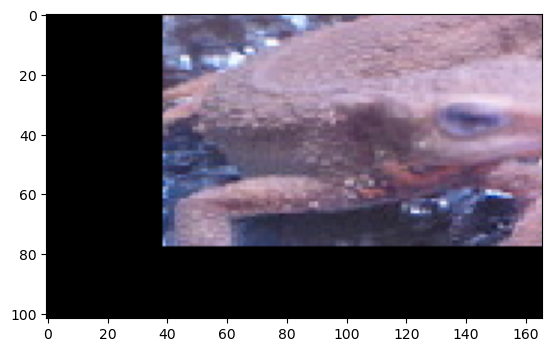

In [2]:
def affine_linear(img, a, b, c, d, tx, ty):
    H, W, C = img.shape

    # 元画像を作成する
    # 画像の外側の座標を参照するとき、余白の座標を指定できるようにする
    tmp = np.zeros((H+2, W+2, C), dtype = np.float32)
    tmp[1:H+1, 1:W+1] = img

    # 出力先の画像を作成する
    H_out = np.round(H * d).astype(np.int64)
    W_out = np.round(W * a).astype(np.int64)
    out = np.zeros((H_out, W_out, C), dtype = np.float32)

    # 出力先の画像の座標を取得
    x_out = np.tile(np.arange(W_out), (H_out, 1)) # tuppleで行列ごとの繰り返し回数を指定
    y_out = np.arange(H_out).repeat(W_out).reshape(H_out, -1) # repeatで各値を指定した回数繰り返す

    # 元画像の座標を取得
    # tmpは元の画像の周りに余白を作成しているため、実際の座標を取得するために+1する
    adbc = a * d - b * c
    x = np.round((d * x_out - b * y_out) / adbc).astype(np.int64) - tx + 1
    y = np.round((-c * x_out + a * y_out) / adbc).astype(np.int64) - ty + 1

    # 座標をクリッピング
    # 値が小さい時は0、大きい時はW+1かH+1で余白が指定できる
    x = np.clip(x, 0, W + 1)
    y = np.clip(y, 0, H + 1)

    # 出力先の座標に元画像の座標を設定する
    out[y_out, x_out] = tmp[y, x]
    out = out[:H_out, :W_out]

    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    return out

img = cv2.imread(path)
out = affine_linear(img, a=1.3, b=0, c=0, d=0.8, tx=30, ty=-30)

plt.imshow(out)
plt.show()

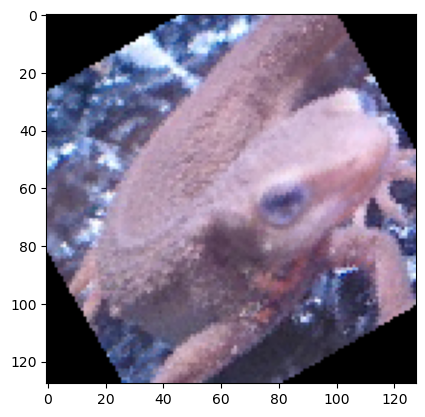

In [3]:
def affine_rotate(img, a, b, c, d, tx, ty):
    H, W, C = img.shape

    # 元画像を作成する
    tmp = np.zeros((H+2, W+2, C), dtype=np.float32)
    tmp[1:H+1, 1:W+1] = img

    # 出力先の画像を作成する
    H_out = np.round(H).astype(np.int64)
    W_out = np.round(W).astype(np.int64)
    out = np.zeros((H_out + 1, W_out + 1, C), dtype=np.float32)

    # 出力先の画像の座標を取得
    x_out = np.tile(np.arange(W_out), (H_out, 1))
    y_out = np.arange(H_out).repeat(W_out).reshape(H_out, -1)

    # 画像の中心
    cx, cy = W // 2, H // 2
    cx_out, cy_out = W_out // 2, H_out // 2

    # 元画像の座標を取得
    adbc = a * d - b * c
    x = np.round((d * (x_out - cx_out) - b * (y_out - cy_out)) / adbc).astype(np.int64) + cx - tx + 1
    y = np.round((-c * (x_out - cx_out) + a * (y_out - cy_out)) / adbc).astype(np.int64) + cy - ty + 1

    # 座標をクリッピング
    x = np.clip(x, 0, W + 1)
    y = np.clip(y, 0, H + 1)

    # 出力先の座標に元画像の座標を設定する
    out[y_out, x_out] = tmp[y, x]
    out = out[:H_out, :W_out]

    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    return out

A = 30.  # 回転角度
theta = -np.pi * A / 180.  # 反時計回りの角度

img = cv2.imread(path)
out = affine_rotate(img, 
             a= np.cos(theta), 
             b= -np.sin(theta), 
             c= np.sin(theta), 
             d= np.cos(theta), 
             tx= 0, 
             ty= 0)

plt.imshow(out)
plt.show()


## Question31-40

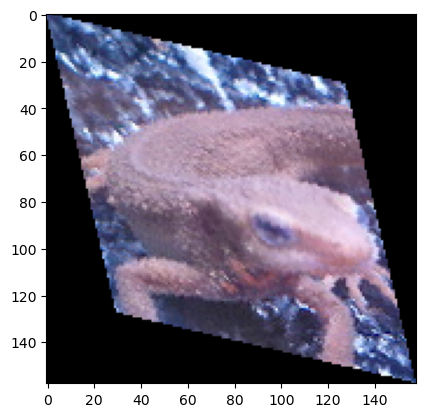

In [42]:
def affine_skew(img, dx, dy):
    H, W, C = img.shape

    # affineパラメータの作成
    a = 1.
    b = dx / H
    c = dy / W
    d = 1
    tx = 0.
    ty = 0.

    # 元画像を作成する
    # 画像の外側の座標を参照するとき、余白の座標を指定できるようにする
    tmp = np.zeros((H+2, W+2, C), dtype = np.float32)
    tmp[1:H+1, 1:W+1] = img

    # 出力先の画像を作成する
    H_out = np.round(dy + H).astype(np.int64)
    W_out = np.round(dx + W).astype(np.int64)
    out = np.zeros((H_out, W_out, C), dtype = np.float32)

    # 出力先の画像の座標を取得
    x_out = np.tile(np.arange(W_out), (H_out, 1)) # tuppleで行列ごとの繰り返し回数を指定
    y_out = np.arange(H_out).repeat(W_out).reshape(H_out, -1) # repeatで各値を指定した回数繰り返す

    # 元画像の座標を取得
    # tmpは元の画像の周りに余白を作成しているため、実際の座標を取得するために+1する
    adbc = a * d - b * c
    x = np.round((d * x_out - b * y_out) / adbc).astype(np.int64) - tx + 1
    y = np.round((-c * x_out + a * y_out) / adbc).astype(np.int64) - ty + 1

    # 座標をクリッピング
    # 値が小さい時は0、大きい時はW+1かH+1で余白が指定できる
    x = np.clip(x, 0, W + 1).astype(np.int64)
    y = np.clip(y, 0, H + 1).astype(np.int64)

    # 出力先の座標に元画像の座標を設定する
    out[y_out, x_out] = tmp[y, x]
    out = out[:H_out, :W_out]

    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    return out

img = cv2.imread(path)
out = affine_skew(img, 30, 30)

plt.imshow(out)
plt.show()

In [4]:
# DFT
def dft(img, K=128, L=128, channel=3):
    H, W, _ = img.shape

    # Prepare DFT coefficient
    G = np.zeros((L, K, channel), dtype=np.complex128)

    # prepare processed index corresponding to original image positions
    x = np.tile(np.arange(W), (H, 1))
    y = np.arange(H).repeat(W).reshape(H, -1)

    # dft
    for c in range(channel):
        for l in range(L):
            for k in range(K):
                G[l, k, c] = np.sum(img[..., c] * np.exp(-2j * np.pi * (x * k / K + y * l / L))) / np.sqrt(K * L)
                #for n in range(N):
                #    for m in range(M):
                #        v += gray[n, m] * np.exp(-2j * np.pi * (m * k / M + n * l / N))
                #G[l, k] = v / np.sqrt(M * N)

    return G

In [5]:
# IDFT
def idft(G, channel=3):
    # prepare out image
    H, W, _ = G.shape
    out = np.zeros((H, W, channel), dtype=np.float32)

    # prepare processed index corresponding to original image positions
    x = np.tile(np.arange(W), (H, 1))
    y = np.arange(H).repeat(W).reshape(H, -1)

    # idft
    for c in range(channel):
        for l in range(H):
            for k in range(W):
                out[l, k, c] = np.abs(np.sum(G[..., c] * np.exp(2j * np.pi * (x * k / W + y * l / H)))) / np.sqrt(W * H)

    # clipping
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    return out

In [ ]:
img = cv2.imread(path).astype(np.float32)
G = dft(img, K=128, L=128, channel=3)
out = idft(G, channel=3)
plt.imshow(out)
plt.show()

In [9]:
def bgr2gray(img):
	gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
	return gray

# DFT
def dft(img, K=128, L=128, channel=3):
    H, W = img.shape  # imgはgrayscale

    # Prepare DFT coefficient
    G = np.zeros((L, K, channel), dtype=np.complex128)

    # prepare processed index corresponding to original image positions
    x = np.tile(np.arange(W), (H, 1))
    y = np.arange(H).repeat(W).reshape(H, -1)

    # dft
    for c in range(channel):
        for l in range(L):
            for k in range(K):
                G[l, k, c] = np.sum(img[..., c] * np.exp(-2j * np.pi * (x * k / K + y * l / L))) / np.sqrt(K * L)
                #for n in range(N):
                #    for m in range(M):
                #        v += gray[n, m] * np.exp(-2j * np.pi * (m * k / M + n * l / N))
                #G[l, k] = v / np.sqrt(M * N)

    return G

# IDFT
def idft(G, channel=3):
    # prepare out image
    H, W, _ = G.shape
    out = np.zeros((H, W, channel), dtype=np.float32)

    # prepare processed index corresponding to original image positions
    x = np.tile(np.arange(W), (H, 1))
    y = np.arange(H).repeat(W).reshape(H, -1)

    # idft
    for c in range(channel):
        for l in range(H):
            for k in range(W):
                out[l, k, c] = np.abs(np.sum(G[..., c] * np.exp(2j * np.pi * (x * k / W + y * l / H)))) / np.sqrt(W * H)

    # clipping
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

    return out

def lpf(G, ratio=0.5, C=1):
    H, W, _ = G.shape

    # transfer positions
    _G = np.zeros_like(G)
    _G[:H//2, :W//2] = G[H//2:, W//2:] # 右下
    _G[:H//2, W//2:] = G[H//2:, :W//2] # 左下
    _G[H//2:, :W//2] = G[:H//2, W//2:] # 右上
    _G[H//2:, W//2:] = G[:H//2, :W//2] # 左上

    # 原点(画像中央)からの距離を計算
    x = np.tile(np.arange(W), (H, 1))
    y = np.arange(H).repeat(W).reshape(H, -1)

    _x = x - W // 2
    _y = y - H // 2
    r = np.sqrt(_x ** 2 + _y ** 2)

    # フィルタを適用
    mask = np.ones((H, W), dtype=np.float32)
    mask[r > (W // 2 * ratio)] = 0
    mask = np.repeat(mask, C).reshape(H, W, C)
    _G *= mask

    # 元の場所に戻す
    G[:H//2, :W//2] = _G[H//2:, W//2:]
    G[:H//2, W//2:] = _G[H//2:, :W//2]
    G[H//2:, :W//2] = _G[:H//2, W//2:]
    G[H//2:, W//2:] = _G[:H//2, :W//2]

    return G

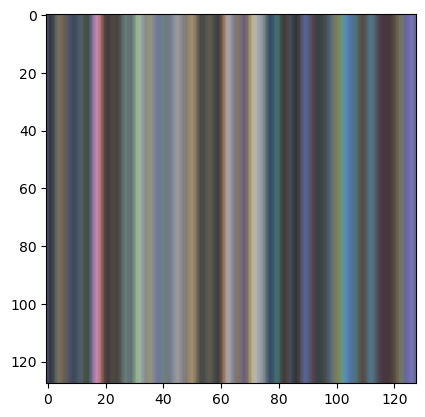

In [10]:
img = cv2.imread(path)
gray = bgr2gray(img)
G = dft(gray)
G = lpf(G)
out = idft(G)

plt.imshow(out)
plt.show()